<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Image Filters using numpy</p>

<p style="font-family: Verdana; font-size:1.75em; color:#2462C0; font-style:bold">Loading the libraries we need: numpy, scipy, matplotlib</p>

In [157]:
%matplotlib inline
import numpy as np
from scipy import misc #Scipy library helps in the image processing ascept and misc helps in miscellaneous utilities (e.g. image reading/writing)
import matplotlib.pyplot as plt

<p style="font-family: Verdana; font-size:1.75em; color:#2462C0; font-style:bold">Creating a numpy array from an image file:</p>

<br>
Lets choose a portrait image file as an ndarray and display its type

In [158]:
from skimage import data

photo_data = misc.imread('./image/test.jpg')

type(photo_data)

numpy.ndarray

Lets see what is in the image

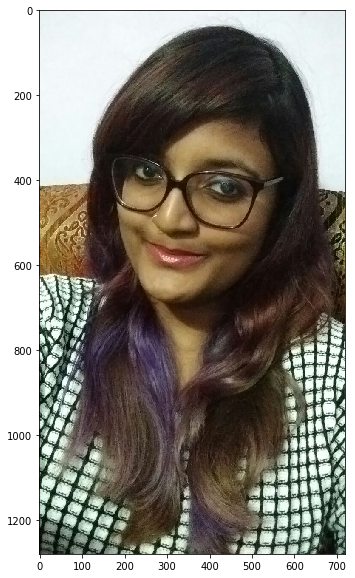

In [159]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [160]:
photo_data.shape

#print(photo_data)

(1280, 720, 3)

The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
RGB Color Mapping in the Photo:</p> <br>
<ul>
<li><p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold">
RED pixel indicates Altitude</p>
<li><p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">
BLUE pixel indicates Aspect
</p>
<li><p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold">
GREEN pixel indicates Slope
</p>
</ul>
<br>
The higher values denote higher altitude, aspect and slope.

In [161]:
photo_data.size

2764800

In [162]:
photo_data.min(), photo_data.max()

(0, 255)

In [163]:
photo_data.mean()

103.40021520543982

Pixel on the 150th Row and 250th Column

In [164]:
photo_data[150, 250]

array([122, 109, 100], dtype=uint8)

In [165]:
photo_data[150, 250, 1]

109

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Set a Pixel to All Zeros</p>
<br/>
We can set all three layer in a pixel as once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

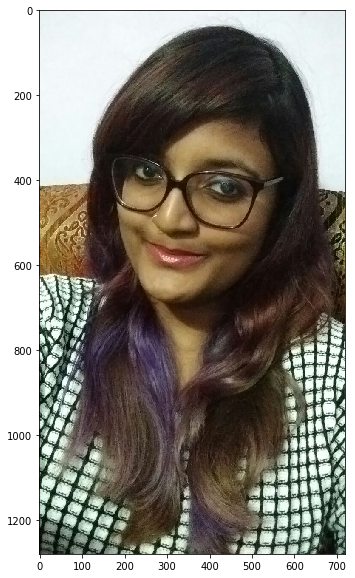

In [166]:
#photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data[150, 250] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Changing colors in a Range<p/>
<br/>
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 t0 800 to full intensity.

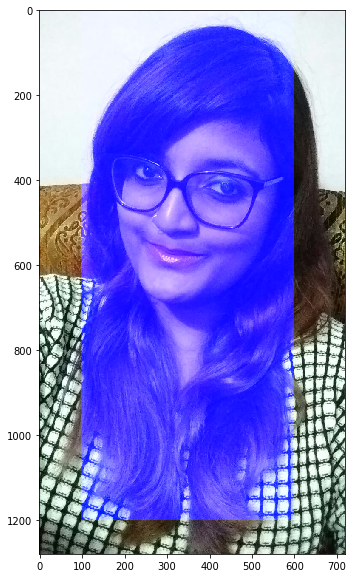

In [167]:
photo_data = misc.imread('./image/test.jpg')

photo_data[0:1200, 100:600 ,2] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

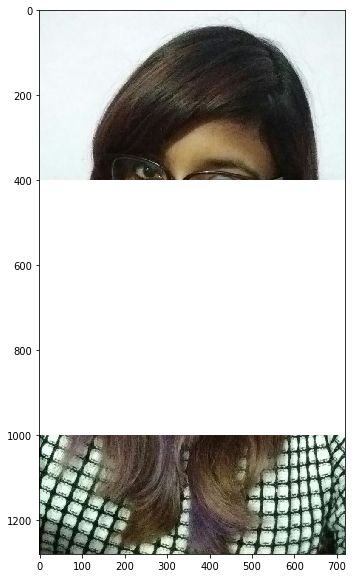

In [168]:
photo_data = misc.imread('./image/test.jpg')

photo_data[400:1000, :] = 255
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

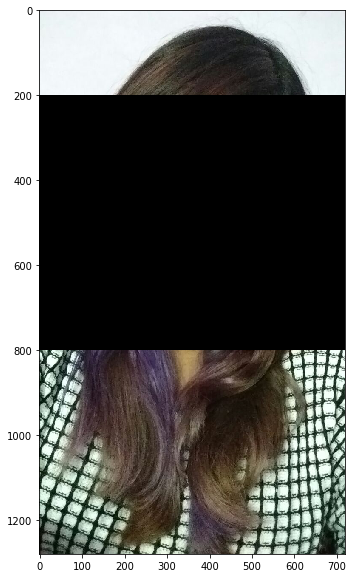

In [169]:
photo_data = misc.imread('./image/test.jpg')

photo_data[200:800, :] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Pick all Pixels with Low Values</p>

In [170]:
photo_data = misc.imread('./image/test.jpg')
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 200
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (1280, 720, 3)
Shape of low_value_filter: (1280, 720, 3)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Filtering Out Low Values</p><br/>
Whenever the low_value_filter is True, set value to 0

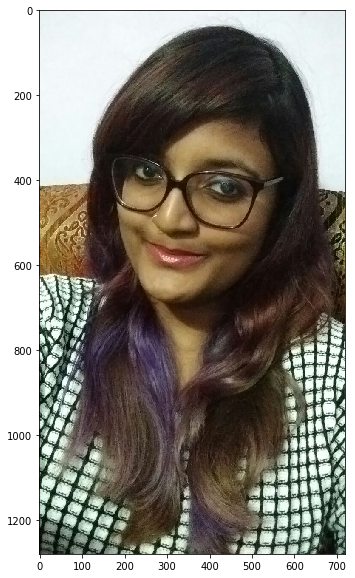

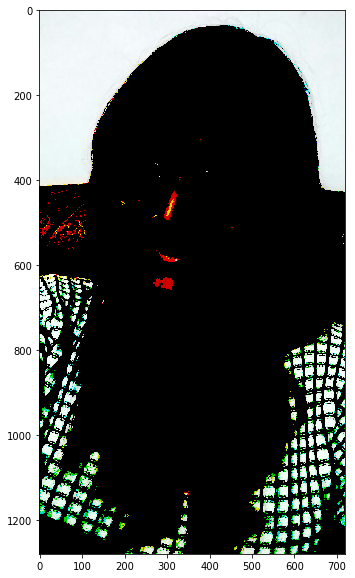

In [171]:
#import random
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
More Row and Column Operations</p><br>
You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

In [172]:
rows_range = np.arange(len(photo_data))
cols_range = np.arange(len(photo_data[0]))
print(type(rows_range),type(cols_range))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [173]:
if (len(rows_range) < len(cols_range)):
    photo_data[rows_range, rows_range] = 255
else:
 photo_data[cols_range, cols_range] = 255

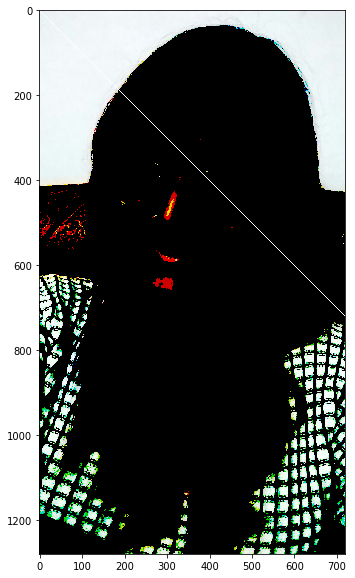

In [174]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Further Processing to create more RGB filters </p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Processing of RED Pixels</p>

We will do this by detecting high intensity RED Pixels and muting down other areas.

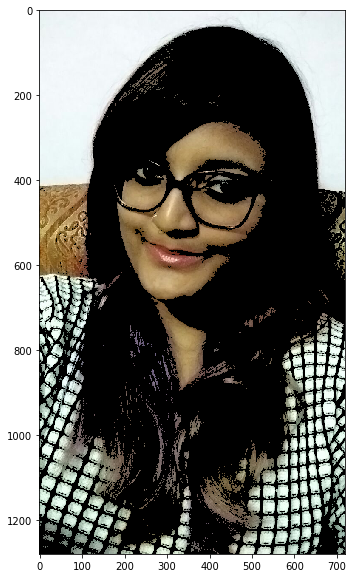

In [175]:
photo_data = misc.imread('./image/test.jpg')
red_mask   = photo_data[:, : ,0] < 100

photo_data[red_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highl-GREEN Pixels</p>

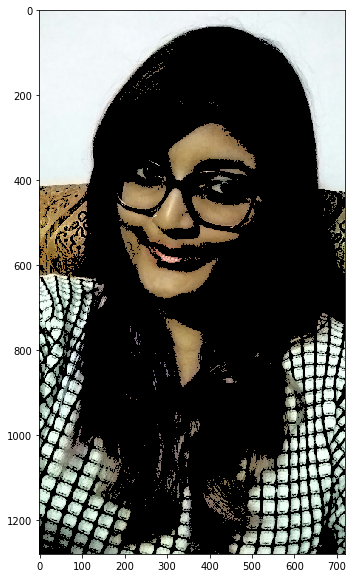

In [176]:
photo_data = misc.imread('./image/test.jpg')
green_mask = photo_data[:, :, 1 ] < 100

photo_data[green_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Detecting Highly-BLUE Pixels</p>

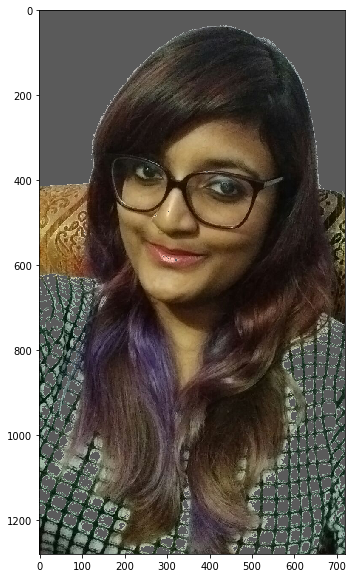

In [177]:
photo_data = misc.imread('./image/test.jpg')
blue_mask  = photo_data[:, : ,2] >180

photo_data[blue_mask] = 90
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE</p>

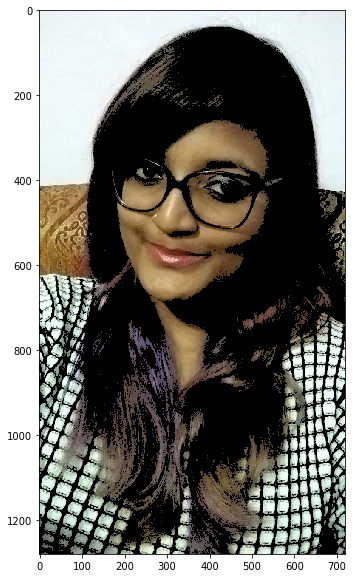

In [178]:
photo_data = misc.imread('./image/test.jpg')

red_mask   = photo_data[:, : ,0] < 80
green_mask = photo_data[:, : ,1] < 120
blue_mask  = photo_data[:, : ,2] > 160

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)